<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/Tecnicas_SMOOTE_Framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de enfermedades del corazón
### ¿Tendrá un paciente un riesgo de 10 años de desarrollar una enfermedad cardiovascular?

### Tabla de contenido
1. [Introducción](#introduction)
2. [Análisis Exploratorio de Datos](#paragraph1)
3. [Selección de características](#paragraph2)
4. [Remuestreo](#paragraph3)
5. [Balance de clases usando SMOOTE](#paragraph5)
6. [Balance de clases SMOOTE & Submuestreo Aleatorio de la clase mayoritaria](#paragraph6)
7. [Aplicando el modelo](#paragraph7)

## Introducción <a name="introduction"></a>

**Problema:** La Organización Mundial de la Salud ha calculado que cada año se producen 12 millones de muertes en todo el mundo a causa de enfermedades cardíacas. La mitad de las muertes en Estados Unidos y otros países desarrollados se deben a enfermedades cardiovasculares. El pronóstico precoz de las enfermedades cardiovasculares puede ayudar a tomar decisiones sobre cambios en el estilo de vida de los pacientes de alto riesgo y, a su vez, reducir las complicaciones. Esta investigación pretende señalar los factores de riesgo más relevantes de las enfermedades del corazón, así como predecir el riesgo global utilizando la regresión logística Preparación de los datos

**Fuente:** El conjunto de datos está disponible públicamente en el sitio web de Kaggle, y proviene de un estudio cardiovascular en curso sobre los residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de 10 años de sufrir una futura enfermedad coronaria (CHD).El conjunto de datos proporciona la información de los pacientes. Incluye más de 4.000 registros y 15 atributos. Variables Cada atributo es un factor de riesgo potencial. Hay factores de riesgo demográficos, conductuales y médicos.

**Atributos:**

#### Datos demográficos: 
* Sex: hombre o mujer (nominal) 
* Age: Edad del paciente; (Continua - Aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)  
* Education: no se ha facilitado más información

#### Comportamiento: 
* Current Smoker: si el paciente es o no fumador actual (Nominal)
* Cigs Per Day: el número de cigarrillos que la persona ha fumado en un día (puede considerarse continuo, ya que se puede fumar cualquier número de cigarrillos, incluso medio cigarrillo). 

#### Información sobre el historial médico: 
* BP Meds: si el paciente tomaba o no medicación para la tensión arterial (nominal) 
* Prevalent Stroke: si el paciente ha tenido o no un accidente cerebrovascular previamente (Nominal)
* Prevalent Hyp: si el paciente era o no hipertenso (nominal) 
* Diabetes: si el paciente tenía o no diabetes (nominal)  

#### Información sobre el estado de salud actual: 
* Tot Chol: nivel de colesterol total (continuo)  
* Sys BP: presión arterial sistólica (continua) 
* Dia BP: presión arterial diastólica (continua) 
* BMI: Índice de masa corporal (continuo) 
* Heart Rate: frecuencia cardíaca (Continua - En la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido al gran número de valores posibles).
* Glucose: nivel de glucosa (continuo)  

#### Variable objetivo a predecir: 
* TenYearCHD: Riesgo a 10 años de enfermedad coronaria (CHD) - (binario: "1", significa "Sí", "0" significa "No")


In [2]:
# importing libraries and magic functions

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Análisis Exploratorio de Datos <a name="paragraph1"></a>

In [17]:
# read data
df = pd.read_csv('./sample_data/FraminghamDatosImputadosEM.csv')

# first glimpse at data
df.head(20)


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose,TenYearCHD
0,0,57,1,0,0,0,0,1,0,233,184.0,106.0,38.88,66,40,1
1,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0
2,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
4,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
5,1,43,2,0,0,0,0,1,0,245,144.5,95.0,27.15,70,45,0
6,0,63,1,0,0,0,0,1,0,252,154.0,87.0,28.60,72,45,0
7,0,59,2,1,15,0,0,1,0,167,156.0,104.0,15.96,72,45,1
8,1,42,1,1,5,0,0,0,0,197,102.0,70.5,24.68,83,45,0
9,1,62,1,0,0,0,0,0,0,157,130.0,87.0,28.73,72,47,0


In [15]:
# forma de los datos
df.shape


(4240, 16)

In [6]:

# Tipo de datos
df.dtypes

sex                  int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
Glucose              int64
TenYearCHD           int64
dtype: object

In [ ]:
# Comprobar si hay dupicados
duplicate_df = df[df.duplicated()]
duplicate_df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose,TenYearCHD


In [7]:
# Comprobación de los valores que faltan
df.isna().sum()


sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

<Figure size 1080x720 with 0 Axes>

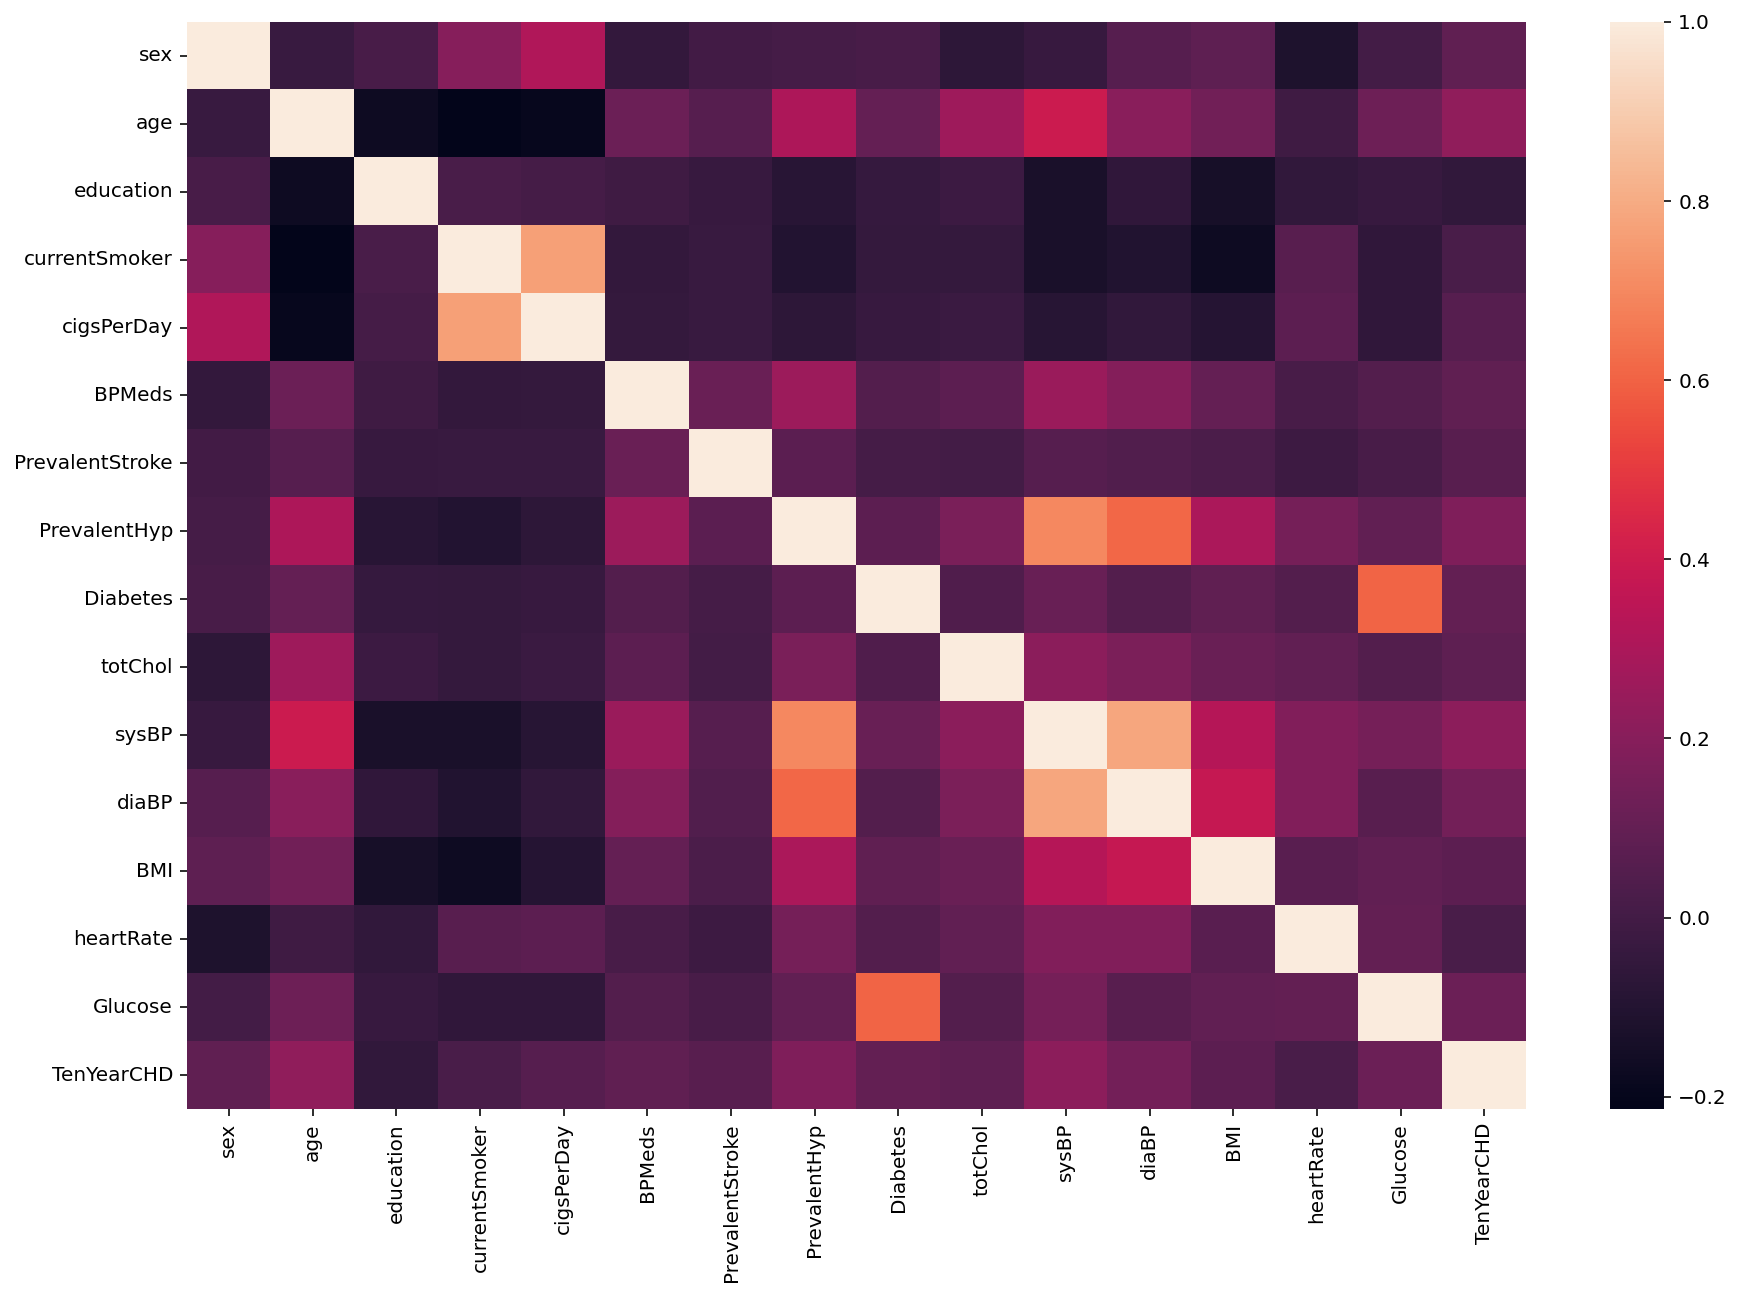

In [9]:
# Comprobar qué características están correlacionadas entre sí y con la variable de resultado
plt.figure(figsize=(15,10))
df_corr = df.corr()
sns.heatmap(df_corr)

**Conclusions from Heatmap:**

Estamos eliminando la columna *educación* porque un médico tendría que decidir en qué nivel de educación poner a un paciente y esto podría dar lugar a resultados muy subjetivos y además no es muy adecuardo de poner en práctica.



<Figure size 1080x720 with 0 Axes>

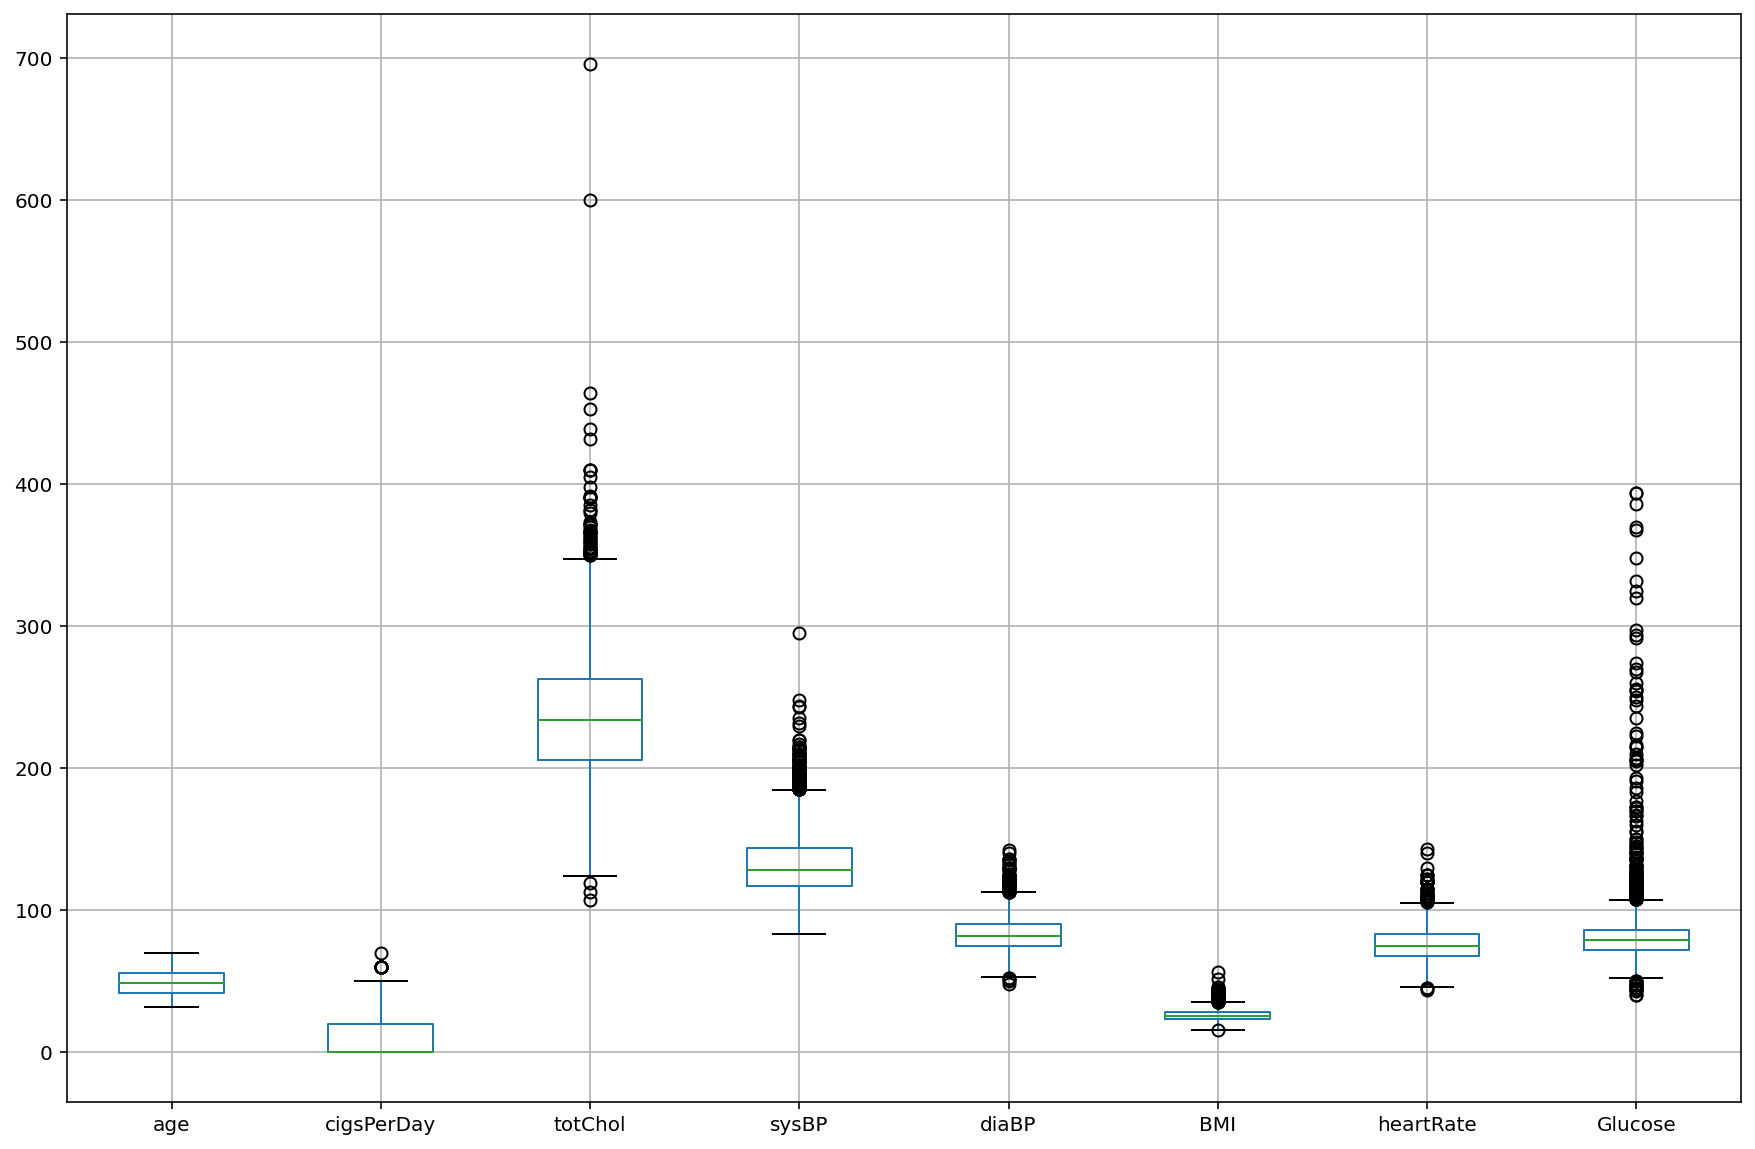

In [10]:
#Visualizar los datos perdidos
plt.figure(figsize=(15,10))
#Columnas numéricas
#numeric_col = ['age','cigsPerDay','totChol','sysBP','diaBP','Glucose']
numeric_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','Glucose']
df.boxplot(numeric_col)

In [18]:
# Eliminar la columna educación
df = df.drop(['education'], axis=1)
df.shape

(4240, 15)

## Tratar los datos atípicos

In [19]:
#Tratar los valores atípicos
#z-score
# encontrar el valor absoluto de la puntuación z para cada observación
z = np.abs (stats.zscore (df))

# solo mantenga las filas en el marco de datos con todas las puntuaciones z inferiores al valor absoluto de 3 
df = df [(z <3) .all (axis = 1)]

# encontrar cuántas filas quedan en el marco de datos 
df.shape



(3847, 15)

## Selección de Características (chi2) <a name="paragraph2"></a>

In [22]:
# Identificar las características con mayor importancia para la variable de resultado Enfermedades del Corazón

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separar las variables independientes y dependientes
X = df.iloc[:,0:14]  # columnas independientes
y = df.iloc[:,-1]    # variable objetivo

# # aplicar la clase SelectKBest para extraer las 10 mejores características
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concatenar dos dataframe para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']  # nombre de las columnas del dataframe
print(featureScores.nlargest(11,'Score'))  



         Atributo       Score
3      cigsPerDay  339.886507
9           sysBP  321.531481
1             age  241.202685
8         totChol  132.052445
10          diaBP   60.692082
6    PrevalentHyp   58.591971
0             sex   20.266895
13        Glucose    7.392637
11            BMI    7.024286
2   currentSmoker    2.332966
12      heartRate    0.772306


In [23]:
#Mostrar el score de las características
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Atributo,Score
3,cigsPerDay,339.886507
9,sysBP,321.531481
1,age,241.202685
8,totChol,132.052445
10,diaBP,60.692082
6,PrevalentHyp,58.591971
0,sex,20.266895
13,Glucose,7.392637
11,BMI,7.024286
2,currentSmoker,2.332966


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Importancia de las características')

Text(0.5, 0, '\n Características')

Text(0, 0.5, 'Importancia \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

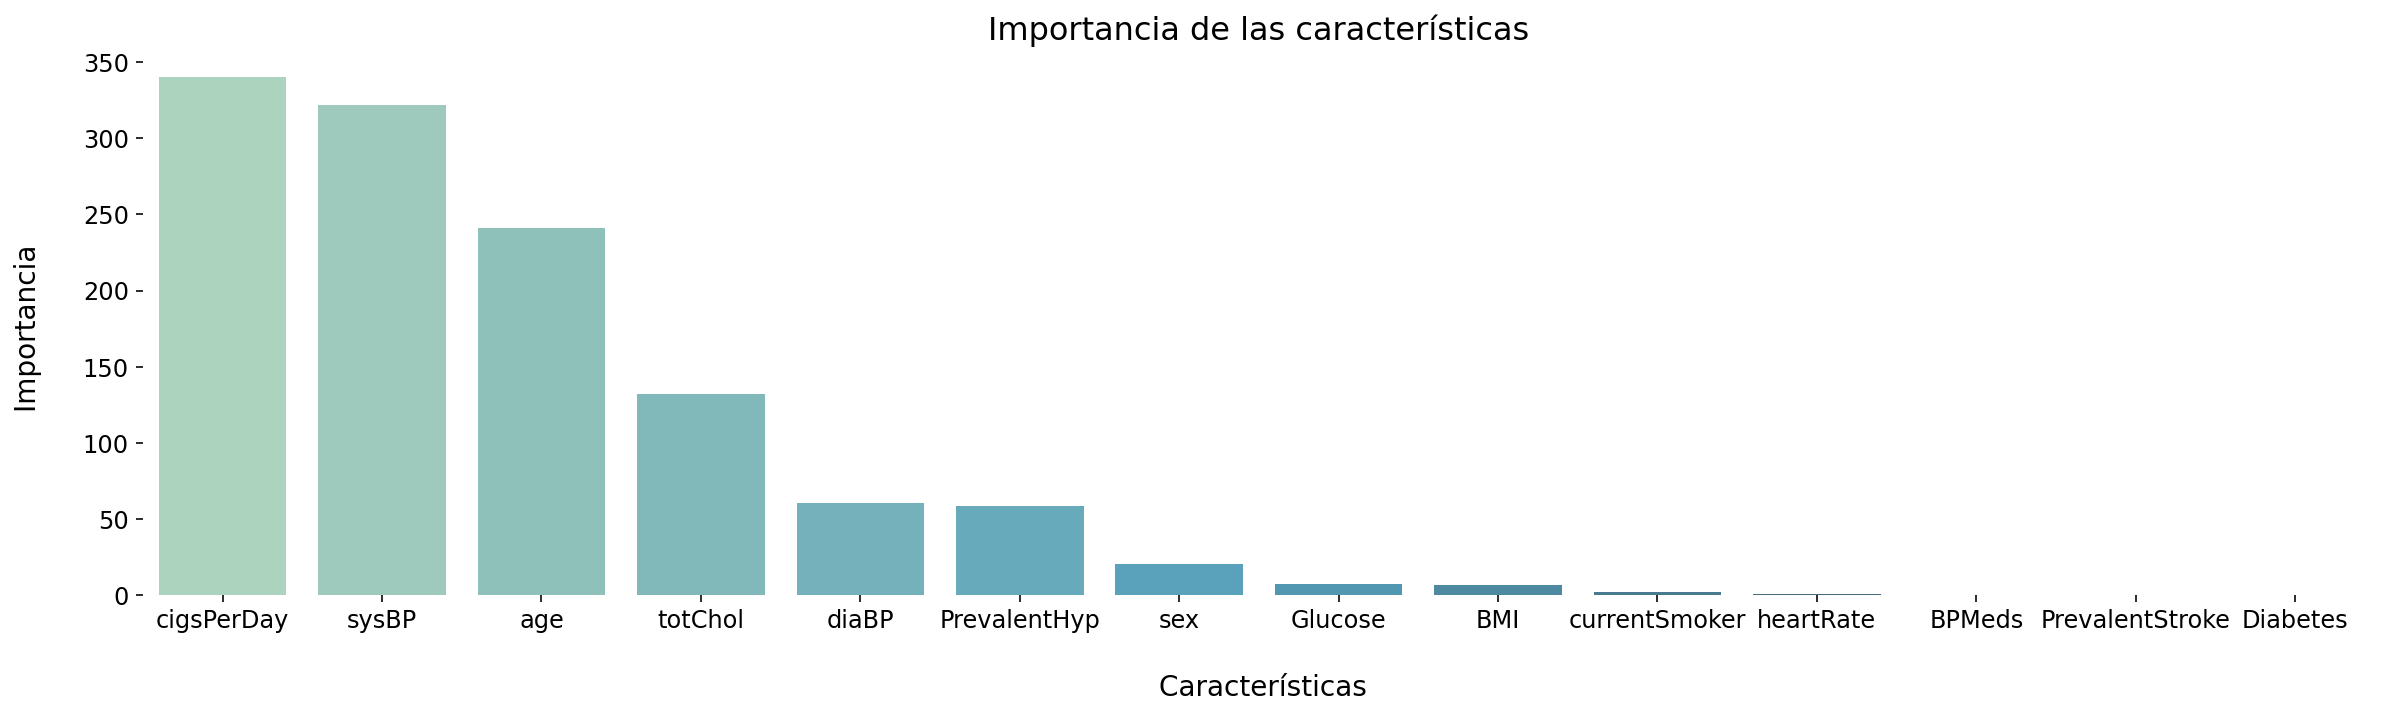

In [25]:
# visualización de la selección de características
plt.figure(figsize=(20,5))
sns.barplot(x='Atributo', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Importancia de las características', fontsize=16)
plt.xlabel('\n Características', fontsize=14)
plt.ylabel('Importancia \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
# Seleccionar las 8 características más impactantes para la variable objetivo
features_list = featureScores["Atributo"].tolist()[:8]
features_list

['cigsPerDay',
 'sysBP',
 'age',
 'totChol',
 'diaBP',
 'PrevalentHyp',
 'sex',
 'Glucose']

Sólo mantendremos las características que tengan la mayor relación con la variable de salida. Estas características son:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- PrevalentHyp
- Sex

In [27]:
# Crear un nuevo dataframe con las características seleccionadas y la variable objetivo

df = df[['sysBP', 'Glucose','age','totChol','cigsPerDay','diaBP','PrevalentHyp','sex','TenYearCHD']]
df.head()

,sysBP,Glucose,age,totChol,cigsPerDay,diaBP,PrevalentHyp,sex,TenYearCHD
1,126.0,40,43,240,43,79.0,0,1,0
2,122.5,43,38,240,0,80.0,0,1,0
3,123.0,44,42,231,20,87.0,0,1,0
4,111.0,44,59,188,40,72.0,1,1,0
5,144.5,45,43,245,0,95.0,1,1,0


<Figure size 1080x720 with 0 Axes>

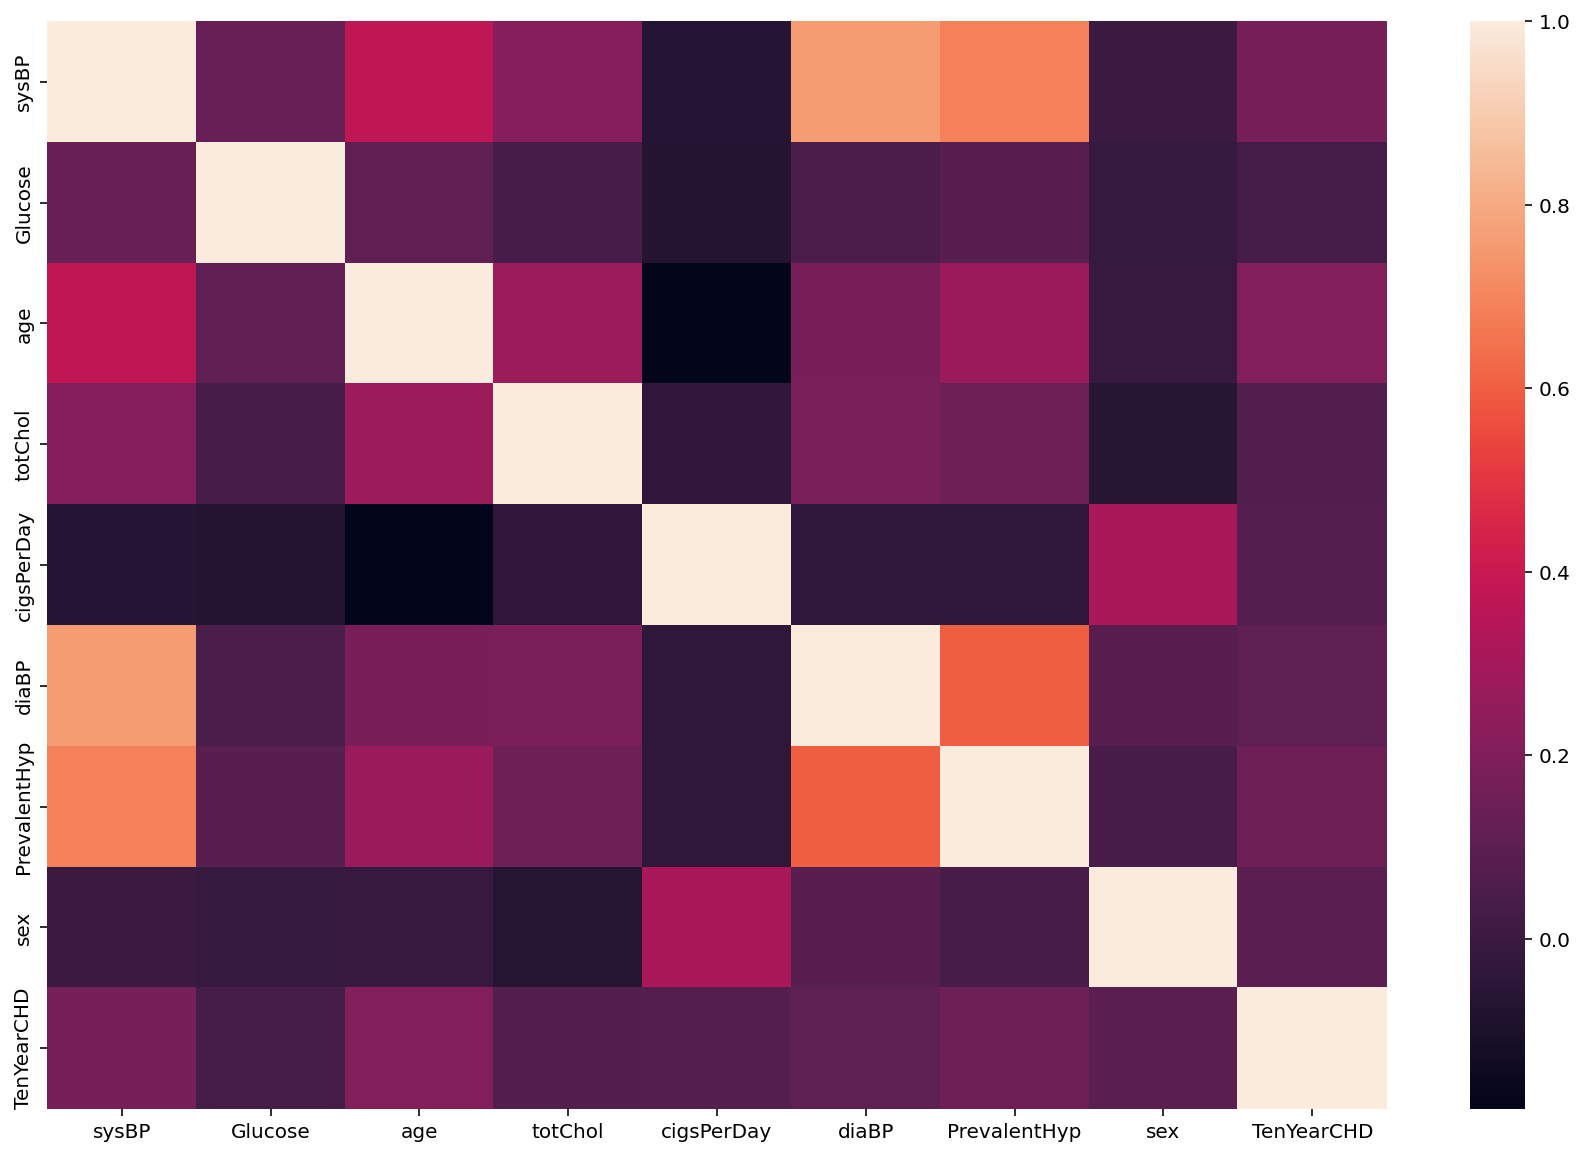

In [29]:
# Comprobar nuevamente la correlación
plt.figure(figsize=(15,10))
df_corr = df.corr()
sns.heatmap(df_corr)

Dividir las características de la variable objetivo

In [30]:
y = df['TenYearCHD'] #variable objetivo
X = df.drop(['TenYearCHD'], axis = 1) #atributos

# divide train test: 80 % - 20 %
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

## Remuestreo de conjuntos de datos desequilibrados <a name="paragraph3"></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

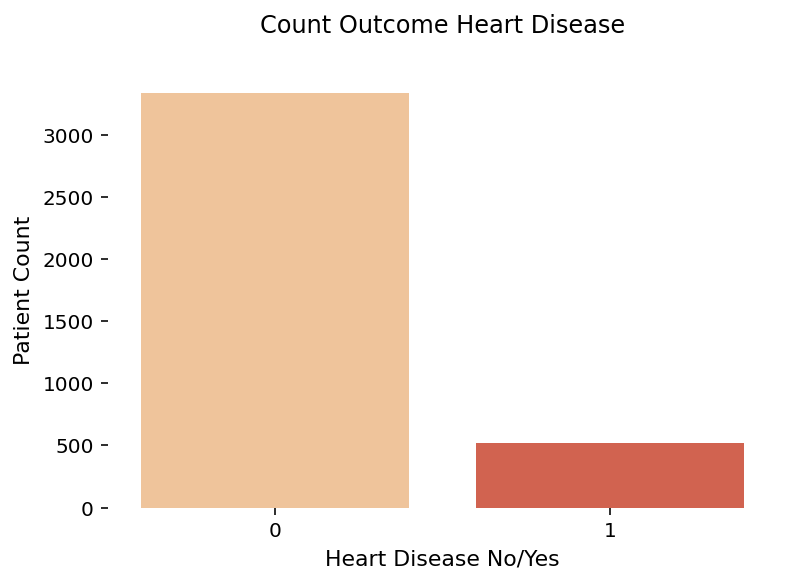

Counter({0: 3331, 1: 516})


In [33]:
from collections import Counter

# Comprobación del equilibrio de la variable de resultado
target_count = df.TenYearCHD.value_counts()
#print('Class 0:', target_count[0])
#print('Class 1:', target_count[1])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

#Mostrar un gráfico de barras de la distribución de clases
sns.countplot(df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

# Resumir la distribución de las clases
counter = Counter(y)
print(counter)

#Diagrama de dispersión del conjunto de datos original
import plotly.express as px
fig = px.scatter(df, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Uno de los principales problemas cuando se trata de conjuntos de datos desequilibrados está relacionado con las métricas utilizadas para evaluar un modelo. El uso de métricas más sencillas, como accuracy_score, puede ser engañoso. En un conjunto de datos con clases muy desequilibradas, si el clasificador siempre "predice" la clase más común sin realizar ningún análisis de las características, seguirá teniendo un alto índice de exactitud, obviamente ilusorio.

### Método de remuestreo 

El submuestreo pretende disminuir el número de casos de la clase sobrerrepresentada en el conjunto de datos. En nuestro caso, estas técnicas disminuirán el número de transacciones fraudulentas en nuestros datos a aproximadamente 50:50. Si no equilibramos el número de instancias, la mayoría de los algoritmos de clasificación se centrarán en gran medida en la clase mayoritaria. Como resultado, podría parecer que su algoritmo está logrando resultados magníficos cuando, en realidad, simplemente está prediciendo siempre la clase mayoritaria.

La forma más sencilla de hacerlo es seleccionar aleatoriamente observaciones de la clase mayoritaria y eliminarlas del conjunto de datos hasta que consigamos un equilibrio entre la clase mayoritaria y la minoritaria.


1    516
0    516
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

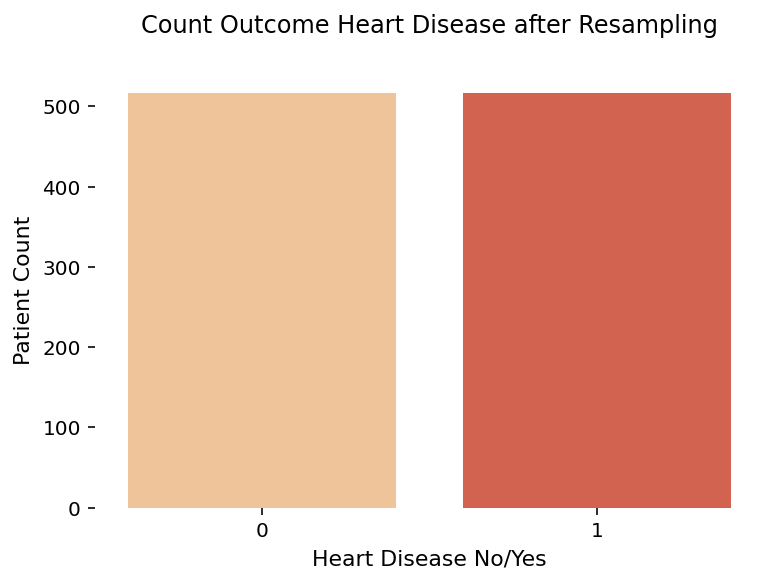

In [36]:
#Copia del conjunto de datos
df2w=df

# Barajar el conjunto de datos df
shuffled_df = df2w.sample(frac=1,random_state=4)

# Poner toda la clase (si tiene ECV) en un conjunto de datos separado.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Seleccione aleatoriamente 516 observaciones de la clase mayoritaria (no tiene ECV)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=516,random_state=42)

# Concatenar de nuevo ambos dataframes 
normalized_df = pd.concat([CHD_df, non_CHD_df])

#  comprobar el nuevo recuentos de clases
normalized_df.TenYearCHD.value_counts()

# Mostramos un diagrama de barras con la distribución de clases ya remuestreadas
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(normalized_df, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()



## Balance de clases SMOOTE <a name="paragraph5"> </a>

In [37]:
import imblearn
print(imblearn.__version__)

0.8.1


In [39]:
# Generar y trazar un conjunto de datos sintéticos de clasificación desequilibrada

from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

#copia del conjunto de datos
X1=X
y1=y

counter = Counter(y)
print(counter)

# Realiza el sobremuestre
oversampleSMOTE = SMOTE()
X1, y1 = oversampleSMOTE.fit_resample(X1, y1)

# nuevo conjunto de datos 
xx = pd.concat([X1,y1], axis=1,)

# summarize the new class distribution
counter = Counter(y1)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()


Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


## Balance de clases SMOOTE & Submuestreo Aleatorio de la clase mayoritaria <a name="paragraph6"> </a> 

Podemos actualizar el ejemplo para primero sobremuestrear la clase minoritaria para tener un 20 por ciento del número de ejemplos de la clase mayoritaria, luego usar submuestreo aleatorio para reducir el número de ejemplos en la clase mayoritaria para tener un 50 por ciento más que el clase minoritaria 

In [40]:
# Sobremuestra con SMOTE y submuestra aleatoria para el conjunto de datos desequilibradost
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#copia del conjunto de datos original
X3=X
y3=y

# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

counter = Counter(y)
print(counter)

# Realiza el proceso de sobremuestreo y submuestreo
X3, y3 = pipeline.fit_resample(X3, y3)

# nuevo conjunto de datos 
xx2 = pd.concat([X3,y3], axis=1,)

# resumir la nueva distribución de clases
counter = Counter(y3)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx2, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()


Counter({0: 3331, 1: 516})
Counter({0: 1427, 1: 999})


Ejecutar el ejemplo primero crea el conjunto de datos y resume la distribución de clases.

A continuación, el conjunto de datos se transforma, primero sobremuestreando la clase minoritaria y luego submuestreando la clase mayoritaria.

## Balance de clases SMOOTE & Borderline <a name="paragraph7"> </a> 

Consiste en seleccionar aquellas instancias de la clase minoritaria que están mal clasificadas, como con un modelo de clasificación de k-vecino más cercano. Luego, podemos sobremuestrear solo esos casos difíciles, brindando más resolución solo donde sea necesario.

En lugar de generar ciegamente nuevos ejemplos sintéticos para la clase minoritaria, esperaríamos que el método Borderline-SMOTE solo creara ejemplos sintéticos a lo largo del límite de decisión entre las dos clases.



In [41]:
# Borderline-SMOTE para un conjunto de datos desequilibrado
 
from imblearn.over_sampling import BorderlineSMOTE

# resumir la distribución de clases original
counter = Counter(y)
print(counter)


oversampleBorderlineSMOTE = BorderlineSMOTE()

#copia del conjunto de datos original
X4=X
y4=y

# Realiza el proceso de sobremuestreo
X4, y4 = oversampleBorderlineSMOTE.fit_resample(X4, y4)

# nuevo conjunto de datos 
xx3 = pd.concat([X4,y4], axis=1,)

# summarize the new class distribution
counter = Counter(y4)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx3, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


## Balance de clases Borderline-SMOTE SVM <a name="paragraph8"> </a> 
Se utiliza una SVM (en lugar de un KNN) para ubicar el límite de decisión definido por los vectores de soporte y los ejemplos en la clase minoritaria que están cerca de los vectores de soporte se convierten en el foco para generar ejemplos sintéticos.

Se crearán aleatoriamente nuevas instancias a lo largo de las líneas que unen cada vector de soporte de clase minoritaria con un número de sus vecinos más cercanos usando la interpolación

In [42]:
# Borderline-SMOTE con SVM para un conjunto de datos desequilibrado
 
from imblearn.over_sampling import SVMSMOTE

# resumir la distribución de la clase (dataset original)
counter = Counter(y)
print(counter)

# transform the dataset
oversampleSVMSMOTE = SVMSMOTE()

#copia del conjunto de datos original
X5=X
y5=y

X5, y5 = oversampleSVMSMOTE.fit_resample(X5, y5)

# nuevo conjunto de datos 
xx4 = pd.concat([X5,y5], axis=1,)

# resumir la nueva distribución de la clase 
counter = Counter(y5)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx4, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


Además de usar una SVM, la técnica intenta seleccionar regiones donde hay menos ejemplos de la clase minoritaria y trata de extrapolar hacia el límite de la clase.


## Balance de clases con Adaptive Synthetic Sampling (ADASYN)<a name="paragraph9"> </a> 
implica generar muestras sintéticas inversamente proporcionales a la densidad de los ejemplos en la clase minoritaria. Es decir, generar más ejemplos sintéticos en regiones del espacio de características donde la densidad de ejemplos minoritarios es baja y menos o ninguno donde la densidad es alta.

In [43]:
# Sobremuestreo y trazado del conjunto de datos desequilibrados con ADASYN
from imblearn.over_sampling import ADASYN

# resumir la distribución de la clase (dataset original)
counter = Counter(y)
print(counter)

# transform the dataset
oversampleADASYN = ADASYN()

#copia del conjunto de datos original
X6=X
y6=y

X6, y6 = oversampleADASYN.fit_resample(X6, y6)

# nuevo conjunto de datos 
xx5 = pd.concat([X6,y6], axis=1,)

# resumir la nueva distribución de la clase 
counter = Counter(y6)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx5, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3200})


A diferencia de Borderline-SMOTE, podemos ver que los ejemplos que tienen la mayor superposición de clases tienen el mayor enfoque. En problemas en los que estos ejemplos de baja densidad pueden ser valores atípicos, el enfoque ADASYN puede poner demasiada atención en estas áreas del espacio de características, lo que puede resultar en un peor rendimiento del modelo.

## Aplicando el modelo<a name="paragraph9"></a>

In [ ]:
#aquí debemos poner el modelo que mejoreres resultados nos de
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


KeyboardInterrupt: ignored